In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

 Importing Dataset and Exploratry Data Analysis

In [3]:
job_placement = pd.read_excel("Job_Placement_Data_Cleaned.xlsx")
job_placement.head(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,Male,67.00,Others,91.00,Others,Commerce,58.00,Science & Tech,No,55.0,Human Resources,58.80,Placed
1,Male,79.33,Central,78.33,Others,Science,77.48,Science & Tech,Yes,86.5,Finance,66.28,Placed
2,Male,65.00,Central,68.00,Central,Arts,64.00,Comm & Mgmt,No,75.0,Finance,57.80,Placed
3,Male,56.00,Central,52.00,Central,Science,52.00,Science & Tech,No,66.0,Human Resources,59.43,Not Placed
4,Male,85.80,Central,73.60,Central,Commerce,73.30,Comm & Mgmt,No,96.8,Finance,55.50,Placed


In [5]:
job_placement.shape

(215, 13)

In [7]:
#learning some basic statistics like mean, count, percentiles and so on about numeric columns
job_placement.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [9]:
#checking for any null values in any column
job_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [22]:
#placing the names of all categorical variables in a column
categorical_col = ["gender", "ssc_board", "hsc_board", "specialisation", 
                   "undergrad_degree", "work_experience","hsc_subject","status"]

numeric_col = ["ssc_percentage", "hsc_percentage", "degree_percentage", "emp_test_percentage", 
               "mba_percent"]

In [18]:
#showing number fo unique values per categorical column
job_placement[categorical_col].nunique()

gender              2
ssc_board           2
hsc_board           2
specialisation      2
undergrad_degree    3
work_experience     2
hsc_subject         3
status              2
dtype: int64

In [22]:
#displaying the frequency at which values occur by columns for categorical variables
for col in categorical_col:
    print(job_placement[col].value_counts().reset_index())

   gender  count
0    Male    139
1  Female     76
  ssc_board  count
0   Central    116
1    Others     99
  hsc_board  count
0    Others    131
1   Central     84
    specialisation  count
0          Finance    120
1  Human Resources     95
  undergrad_degree  count
0      Comm & Mgmt    145
1   Science & Tech     59
2           Others     11
  work_experience  count
0              No    141
1             Yes     74
  hsc_subject  count
0    Commerce    113
1     Science     91
2        Arts     11
       status  count
0      Placed    148
1  Not Placed     67


Creating Heatmap to Display Correlation Between Variables or Columns

<Axes: >

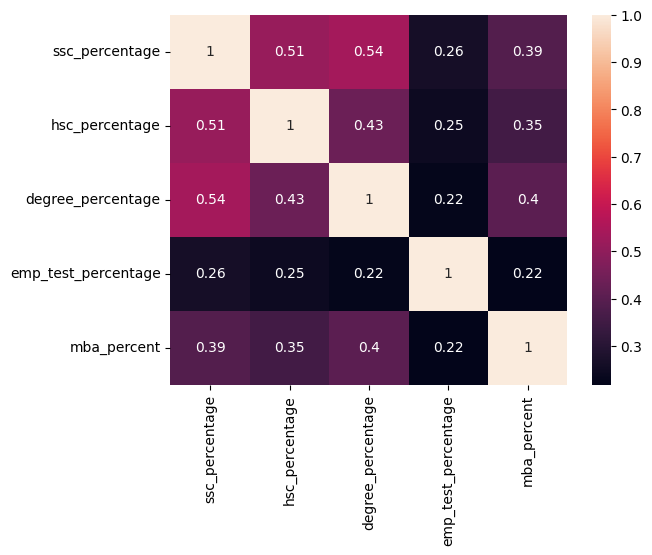

In [53]:
sns.heatmap(job_placement.corr(numeric_only=True), annot=True)

Pie Chart Displaying Number of Subjects per Employment Status

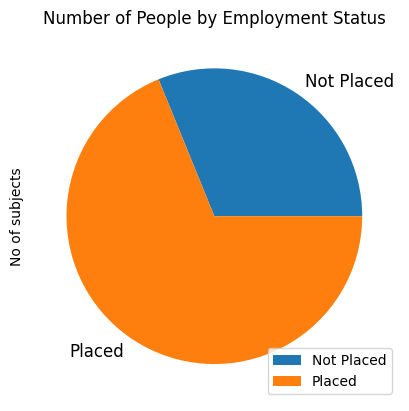

In [46]:
#retrieving the number of entries in gender column for each value of status
def pie_chart_status():
    num_status = job_placement.groupby(by=["status"]).count()["gender"]
    num_status = num_status.reset_index()
    num_status.rename(columns={"gender": "count"}, inplace=True) #renaming columns so it makes sense
    num_status.set_index("status", inplace=True) #make status the index so it shows up on the legend
    ax = num_status.plot(
        kind="pie", y="count", title="Number of People by Employment Status", fontsize=12)
    ax.set_ylabel("No of subjects")
    plt.show()

pie_chart_status()

Barchart Displaying Number of People per HSC Subject and Employment Status

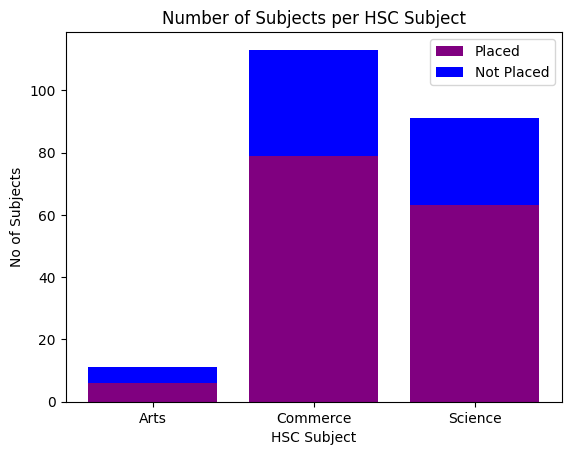

In [51]:
def hsc_subject_status_bar():
    #finds the number of subjects per HSC subject and Employment Status
    num_subject_status = job_placement.groupby(by=["hsc_subject", "status"]).count()["gender"]
    num_subject_status = num_subject_status.reset_index()#to make renaming easier
    num_subject_status.rename(columns={"gender": "count"}, inplace=True)
    #finds the number of subjects per HSC subject that were placed
    num_sub_placed = num_subject_status.query("status == 'Placed'")
    #finds the number of subjects per HSC subject that were not placed or not employed
    num_sub_not_placed = num_subject_status.query("status == 'Not Placed'")
    
    plt.bar(x=num_sub_placed["hsc_subject"], height=num_sub_placed["count"], color="purple")
    #placing not placed above placed
    plt.bar(x=num_sub_not_placed["hsc_subject"], 
            height=num_sub_not_placed["count"], color="blue", bottom=num_sub_placed["count"])
    plt.ylabel("No of Subjects")
    plt.xlabel("HSC Subject")
    plt.legend(["Placed", "Not Placed"])
    plt.title("Number of Subjects per HSC Subject")
    plt.show()

hsc_subject_status_bar()

Training the Classification Models

In [5]:
y_df = job_placement["status"]
x_df = job_placement.drop(columns=["status"])
#encoding status column for training models
label_status = LabelEncoder()
y_df = label_status.fit_transform(y_df)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=32)

In [23]:
#Pipeline(steps= [("one hot encode", OneHotEncoder()), ("scaler", StandardScaler())])
pre_process = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_col), 
                                              ("cat", OneHotEncoder(), categorical_col[:-1])])
pre_process

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['ssc_percentage', 'hsc_percentage',
                                  'degree_percentage', 'emp_test_percentage',
                                  'mba_percent']),
                                ('cat', OneHotEncoder(),
                                 ['gender', 'ssc_board', 'hsc_board',
                                  'specialisation', 'undergrad_degree',
                                  'work_experience', 'hsc_subject'])])

In [57]:
def cross_validation_k():
    """
        performs cross validation on the training data to find the best values for k/number of neighbors
        and weights and returns k and value of weights that gives the highest accuracy
    """
    k_range = list(range(3, 30))
    param_grid = {"knn__n_neighbors": k_range, "knn__weights":["uniform", "distance"]}
    pipe = Pipeline(steps=[("pre_process", pre_process), ("knn",KNeighborsClassifier())])
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring="accuracy")
    grid.fit(x_train, y_train)
    print(grid.best_params_)
    return grid.best_params_
    

In [59]:
#training KNN using a pipeline using the parameters gotten from cross_validation_k()
best_params = cross_validation_k()
knn = KNeighborsClassifier(n_neighbors=best_params["knn__n_neighbors"], weights=best_params["knn__weights"])
pipe_knn = Pipeline(steps=[("preprocess", pre_process), ("knn", knn)])

{'knn__n_neighbors': 25, 'knn__weights': 'uniform'}


In [24]:
#training Logistic Regression using a pipeline
pipe_log = Pipeline(steps=[("preprocess", pre_process), 
                           ("log", LogisticRegressionCV(solver="liblinear", random_state=32))])

Testing the Models and Plotting ROC curves

In [44]:
def plot_roc_curve(estimator):
    y_pred_prob = estimator.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve")
    plt.plot([0, 1], [0, 1], label="Random Guessing")
    plt.xlabel("1-Specifity")
    plt.ylabel("Sensitivity")
    plt.legend()
    plt.show()

In [25]:
pipe_log.fit(x_train, y_train)
log_predict = pipe_log.predict(x_test)
print(confusion_matrix(y_test, log_predict))
#order is tn, fp, fn, tp
print(classification_report(y_test, log_predict))

[[16  3]
 [ 5 41]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.93      0.89      0.91        46

    accuracy                           0.88        65
   macro avg       0.85      0.87      0.86        65
weighted avg       0.88      0.88      0.88        65



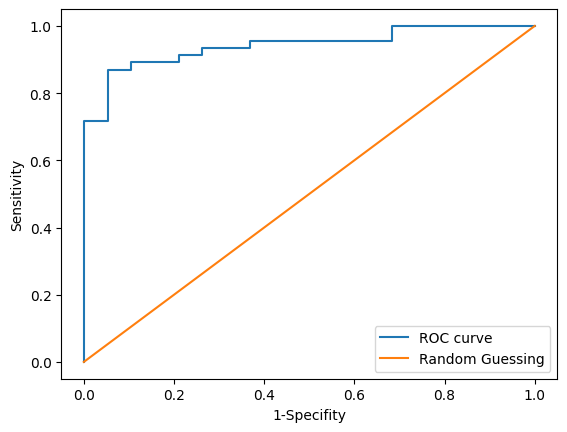

In [46]:
plot_roc_curve(pipe_log)

In [60]:
pipe_knn.fit(x_train, y_train)
knn_predict = pipe_log.predict(x_test)
print(confusion_matrix(y_test, knn_predict))
#order is tn, fp, fn, tp
print(classification_report(y_test, knn_predict))


[[16  3]
 [ 5 41]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.93      0.89      0.91        46

    accuracy                           0.88        65
   macro avg       0.85      0.87      0.86        65
weighted avg       0.88      0.88      0.88        65



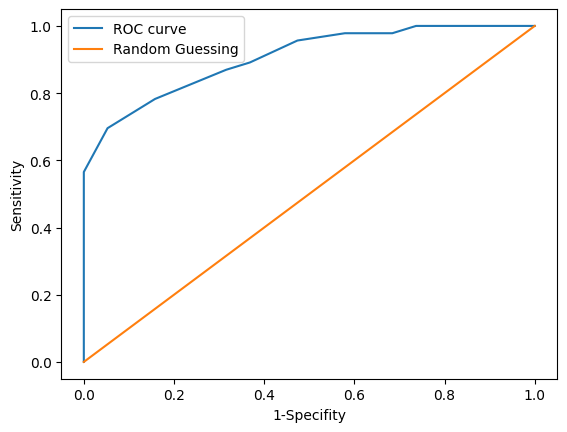

In [61]:
plot_roc_curve(pipe_knn)

In [63]:
predict_df = x_test
predict_df["y_predict"] = label_status.inverse_transform(log_predict)
predict_df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,y_predict
117,Male,77.0,Others,75.0,Others,Science,73.0,Science & Tech,No,80.0,Finance,67.05,Placed
116,Male,68.2,Central,72.8,Central,Commerce,66.6,Comm & Mgmt,Yes,96.0,Finance,70.85,Placed
108,Male,61.0,Central,82.0,Central,Commerce,69.0,Comm & Mgmt,No,84.0,Finance,58.31,Placed
118,Male,76.0,Central,80.0,Central,Science,78.0,Science & Tech,Yes,97.0,Human Resources,70.48,Placed
177,Female,73.0,Central,97.0,Others,Commerce,79.0,Comm & Mgmt,Yes,89.0,Finance,70.81,Placed
